In [2]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_scripts


In [3]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

In [4]:
# Import the nEXO sensitivity classes

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood
import nEXOMaterialsDBInterface

import importlib
importlib.reload( nEXOMaterialsDBInterface )
importlib.reload( nEXOFitWorkspace )
importlib.reload( nEXOFitModel )

<module 'nEXOFitModel' from '../../modules/nEXOFitModel.py'>

# Bkg contributions from baseline 2019 (D-023)

In [6]:
#optimized_binning_yaml = '/p/vast1/nexo/sensitivity2020/pdfs/config_files/Sensitivity2020_Optimized_DNN_Standoff_Binning_version1.yaml'
optimized_binning_yaml = '../config/Sensitivity2020_Optimized_DNN_Standoff_Binning_version1.yaml'
workspace2020 = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)
workspace2020_ind = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)

optimized_binning_components_table = '/p/vast1/nexo/sensitivity2020/pdfs/component_tables/ComponentsTable_D-023_Optimized_DNN_Standoff_Binning_version1_merged-v10b_AllCo60.h5'
workspace2020.LoadComponentsTableFromFile(optimized_binning_components_table)
workspace2020_ind.LoadComponentsTableFromFile(optimized_binning_components_table)




Loading input data froma previously-generated components table....

Loaded dataframe with 173 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']

Loading input data froma previously-generated components table....

Loaded dataframe with 173 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']


In [7]:
#Give each compoennt its own group

groupdict2020 = {}
for index, row in workspace2020_ind.df_components.iterrows():
    if row['Histogram'] is None:
        continue
    groupdict2020[row['PDFName']] = row['Group']
    workspace2020_ind.df_components.loc[index,'Group'] = row['PDFName']



In [8]:
groups = set(groupdict2020.values())

group_component_dict = dict()

for group in groups:
    group_component_dict[group] = [k for k,v in groupdict2020.items() if v == group]


In [9]:
#Create the PDFs for the standard model
workspace2020.CreateGroupedPDFs()
model2020 = nEXOFitModel.nEXOFitModel()
model2020.AddPDFsFromDataframe(workspace2020.df_group_pdfs,\
                               workspace2020.histogram_axis_names)
model2020.GenerateModelDistribution()




Creating grouped PDFs....
no sigma for Rn222_HFE (R-053.9.1.1)
no sigma for Rn222_CathodeRadon (R-088.1.1.1)
no sigma for Rn222_ActiveLXe (R-088.2.1.1)
no sigma for Rn222_InactiveLXe (R-088.3.1.1)

ERROR: No histogram available for K40_OuterCryostatWTSupport

ERROR: No histogram available for Co60_OuterCryostatWTSupport
	Group:                              	Expected Counts:
	Far                                 	      5073.3134
	Vessel_U238                         	     17228.4795
	Vessel_Th232                        	      2748.3922
	FullTPC_Co60                        	     12171.6448
	Internals_U238                      	     23781.8265
	Internals_Th232                     	      4806.9998
	FullTPC_K40                         	  40793795.4507
	Rn222                               	     19019.0283
	B8nu                                	        12.9712
	FullLXeBb2n                         	  14756881.4535
	FullLXeBb0n                         	         0.0001
	Xe137                      

Hist(14 bins in [0.0,1.0], 250 bins in [1000.0,3500.0], 22 bins in [0.0,650.0], with sum 55635584.27658396, 8306 empty bins, and 0 non-finite values)

In [10]:
# Create the PDFs for the individual-component model
workspace2020_ind.CreateGroupedPDFs()
model2020_ind = nEXOFitModel.nEXOFitModel()
model2020_ind.AddPDFsFromDataframe(workspace2020_ind.df_group_pdfs,\
                               workspace2020_ind.histogram_axis_names)
model2020_ind.GenerateModelDistribution()





Creating grouped PDFs....
no sigma for Rn222_HFE (R-053.9.1.1)
no sigma for Rn222_CathodeRadon (R-088.1.1.1)
no sigma for Rn222_ActiveLXe (R-088.2.1.1)
no sigma for Rn222_InactiveLXe (R-088.3.1.1)

ERROR: No histogram available for K40_OuterCryostatWTSupport

ERROR: No histogram available for Co60_OuterCryostatWTSupport
	Group:                              	Expected Counts:
	U238_OuterCryostatSupportResin      	         0.0517
	Th232_OuterCryostatSupportResin     	         0.0391
	K40_OuterCryostatSupportResin       	         0.0118
	Co60_OuterCryostatSupportResin      	         0.0000
	U238_OuterCryostatSupportFiber      	         1.9203
	Th232_OuterCryostatSupportFiber     	         4.0381
	K40_OuterCryostatSupportFiber       	         2.7417
	Co60_OuterCryostatSupportFiber      	         0.0127
	U238_OuterCryostatResin             	         8.0236
	Th232_OuterCryostatResin            	         6.5943
	K40_OuterCryostatResin              	         2.9239
	Co60_OuterCryostatResin    

Hist(14 bins in [0.0,1.0], 250 bins in [1000.0,3500.0], 22 bins in [0.0,650.0], with sum 64606108.931060635, 8306 empty bins, and 0 non-finite values)

In [11]:
roi_cut_dict_2020 = {'DNN': (0.86,1.),
                    'Energy (keV)': (2434., 2480.),
                    'Standoff (mm)': (104.5, 650.)
                    }

workspace2020.DefineROI( roi_cut_dict_2020 )
workspace2020_ind.DefineROI( roi_cut_dict_2020 )


DNN:
	Input ROI boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input ROI boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input ROI boundaries:     104.5,    650.0
	Actual ROI boundaries:    100.0,    650.0
DNN:
	Input ROI boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input ROI boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input ROI boundaries:     104.5,    650.0
	Actual ROI boundaries:    100.0,    650.0


## Relative contributions of each group to ROI

In [12]:
total_in_ROI = model2020.GetIntegralInBinRange(workspace2020.GetROIBinIndices())
print('{:4.4} total events in ROI'.format(total_in_ROI))

print('{:<20} {:>13} {:>13}'.format('Name','Counts','Percent'))

group_bkg_dict = dict()

for row in model2020.variable_list:
    this_group_in_roi = model2020.GetComponentIntegralInBinRange(row['Name'],workspace2020.GetROIBinIndices())
    print('{:<20} {:>13.3} {:>13.3}%'.format(row['Name'],\
                                            this_group_in_roi,\
                                            this_group_in_roi/total_in_ROI*100.))
    group_bkg_dict[row['Name'][4:]] = this_group_in_roi



10.35 total events in ROI
Name                        Counts       Percent
Num_Far                       1.14          11.0%
Num_Vessel_U238               2.68          25.9%
Num_Vessel_Th232             0.225          2.18%
Num_FullTPC_Co60               0.0           0.0%
Num_Internals_U238            3.39          32.7%
Num_Internals_Th232         0.0935         0.904%
Num_FullTPC_K40                0.0           0.0%
Num_Rn222                     2.22          21.5%
Num_B8nu                     0.117          1.13%
Num_FullLXeBb2n             0.0586         0.566%
Num_FullLXeBb0n           4.01e-05      0.000388%
Num_Xe137                    0.395          3.82%
Num_Ar42                    0.0394          0.38%


In [13]:
# Name                        Counts       Percent
# Num_Far                       1.09          19.2%
# Num_Vessel_U238              0.358          6.26%
# Num_Vessel_Th232            0.0887          1.55%
# Num_Internals_U238           0.833          14.6%
# Num_Internals_Th232          0.061          1.07%
# Num_FullTPC_K40                0.0           0.0%
# Num_Rn222                     2.75          48.1%
# Num_FullLXeBb2n             0.0604          1.06%
# Num_FullLXeBb0n           3.99e-05      0.000699%
# Num_B8nu                     0.118          2.07%
# Num_Xe137                    0.353          6.18%

## Looking at individual groups


********** Internals_U238 ***********
Name                               Counts (ROI)   Percent of grp
U238_HVPlunger                           0.0017          0.05019%
U238_FieldRings                            1.31            38.77%
U238_SupportRodsandSpacers              0.00317          0.09346%
U238_Cathode                            0.00236          0.06965%
U238_Bulge                               0.0507            1.497%
U238_SiPMStaves                           0.849            25.05%
U238_SiPMModuleInterposer                 0.204            6.009%
U238_SiPMs                               0.0449            1.324%
U238_SiPMCables                           0.196            5.779%
U238_SiPMElectronics                     0.0139           0.4088%
U238_ChargeTilesBacking                  0.0376            1.108%
U238_ChargeTilesSupport                   0.435            12.85%
U238_ChargeTilesCables                    0.229            6.765%
U238_ChargeTilesElectronics           

/g/g20/lenardo1/localpythonpackages/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


Th232_HVFeedthrough                    1.41e-05         0.006274%
Th232_HVFeedthroughCoreTeflon          4.02e-05          0.01785%
Th232_CalibrationGuideTube1             0.00044           0.1955%
Th232_CalibrationGuideTube2            0.000532           0.2359%
Th232_TPCSupportCone                    0.00118           0.5217%
Th232_TPCVessel                           0.138             61.4%
Th232_HVFeedthroughCoreCable           0.000935           0.4148%
Th232_HVFeedthroughCoreConductivePE      1.41e-05         0.006274%

********** Rn222 ***********
Name                               Counts (ROI)   Percent of grp
Rn222_CathodeRadon                         1.62            73.19%
Rn222_ActiveLXe                           0.048            2.161%
Rn222_InactiveLXe                         0.547            24.65%

********** FullLXeBb2n ***********
Name                               Counts (ROI)   Percent of grp
bb2n_FullLXe                             0.0586            100.0%

*********

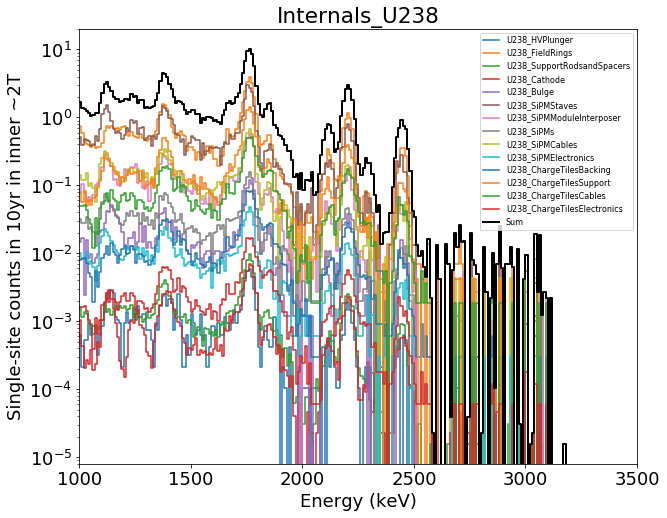

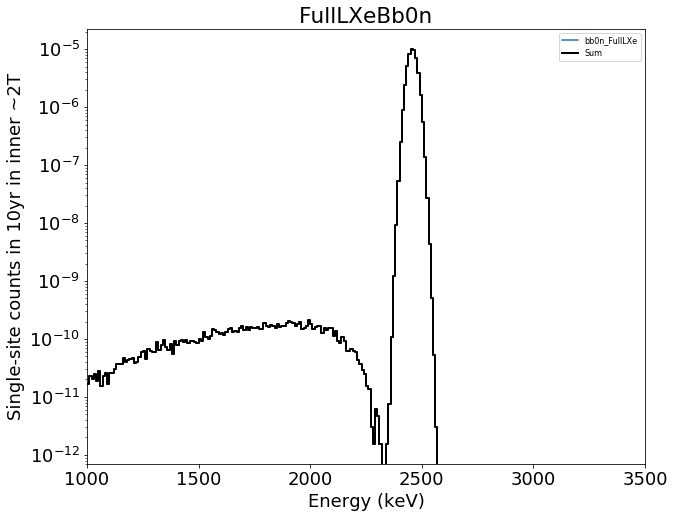

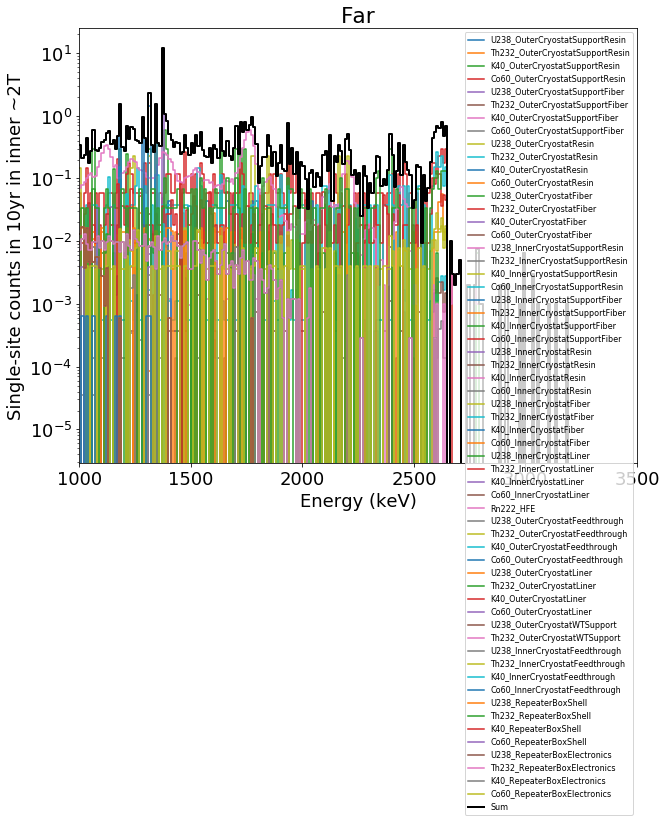

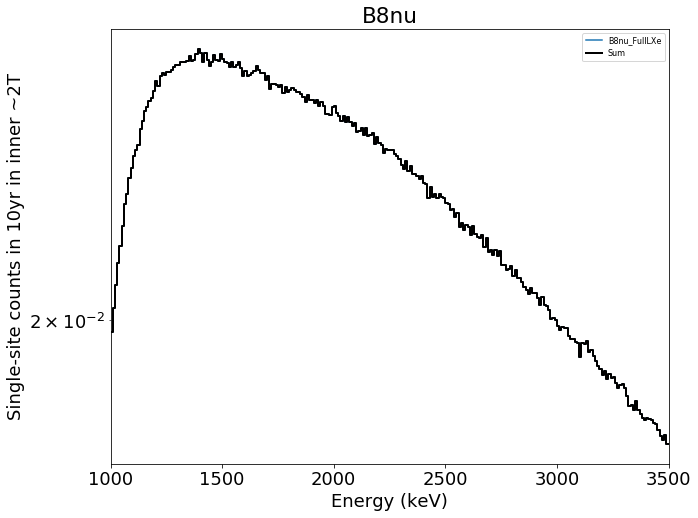

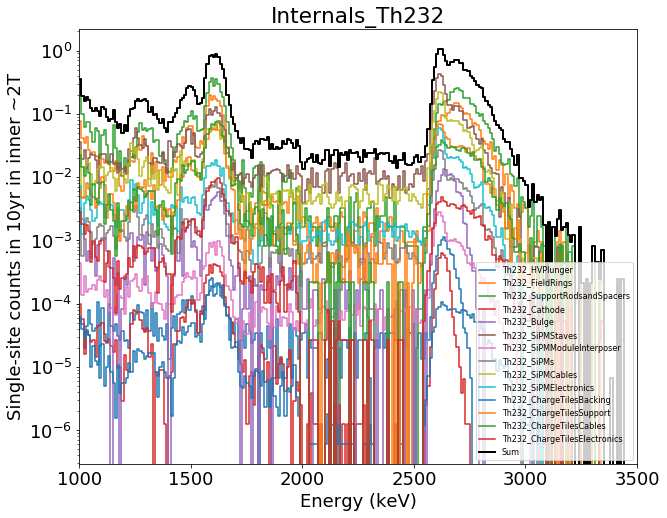

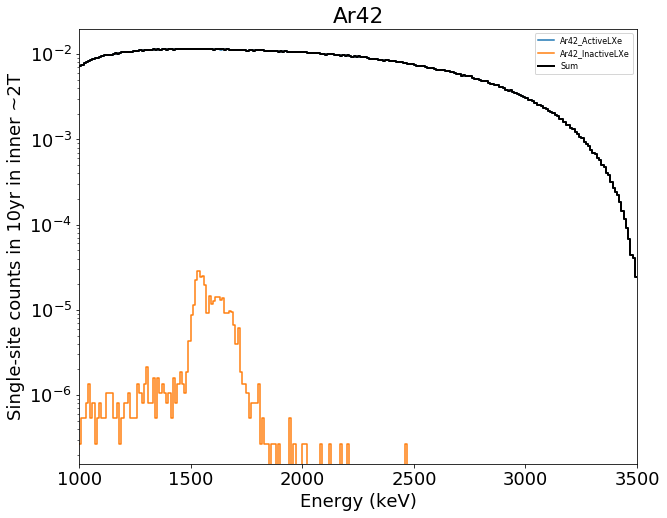

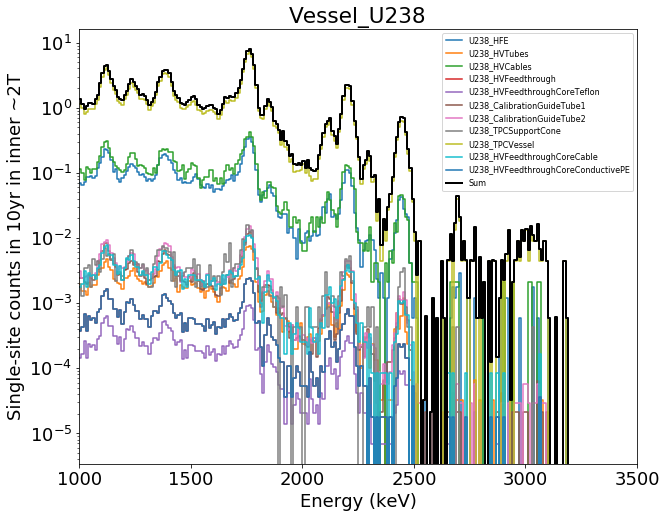

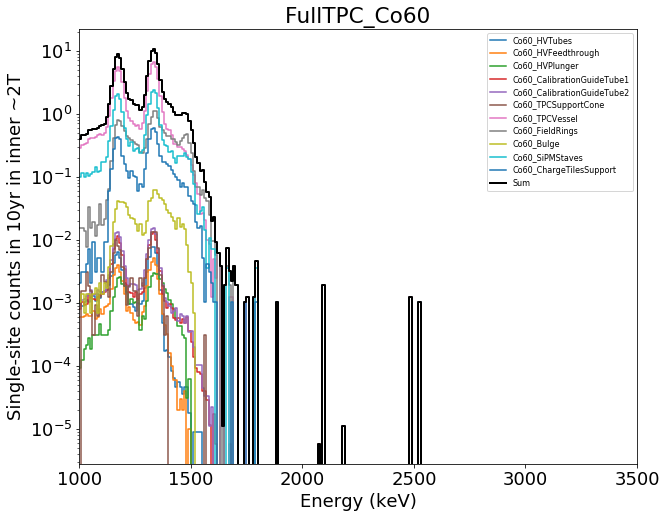

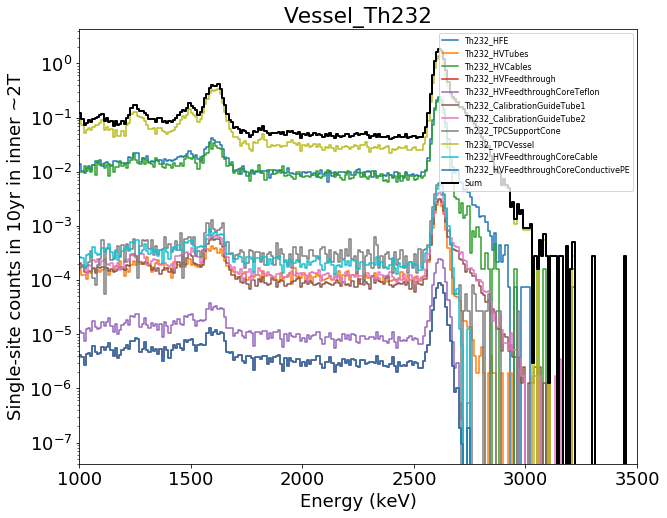

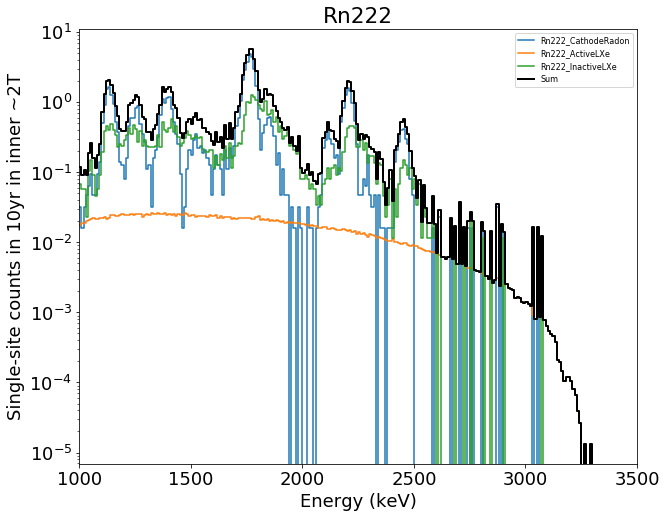

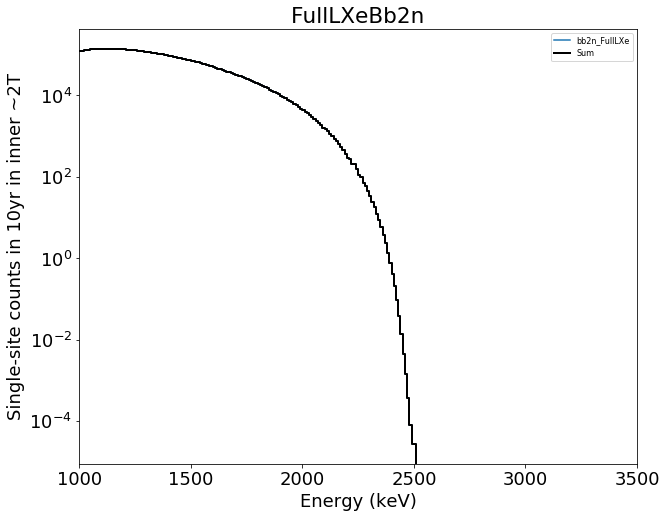

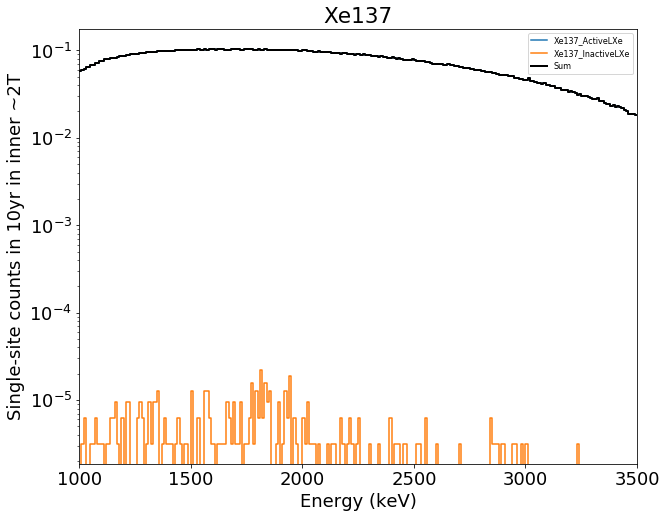

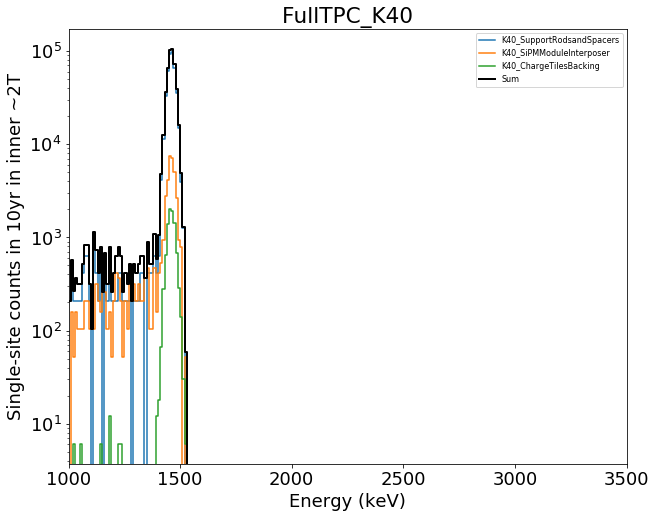

In [15]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)


spectrum_cut_dict_2020 = {'DNN': (0.86,1.),
               'Energy (keV)': (1000.,3500.),
               'Standoff (mm)': (100.,650.)
              }

counter = 0
for group in groups:
    
    plt.figure(counter)
    
    if group == 'Off': continue
    
    component_list = group_component_dict[group]
    
    # Get first component histogram, so we can get the shape and create an empty sum_hist
    idx = model2020_ind.GetVariableIndexByName(component_list[0])
    test_hist = model2020_ind.GetSlicedDistribution(cut_dict=spectrum_cut_dict_2020,\
                                                    renormalize=False,\
                                                    var_name=component_list[0],\
                                                    verbose=False)
    sum_hist = hl.Hist(bins=test_hist.bins,values=np.zeros(test_hist.values.shape))
    
    print('\n********** {} ***********'.format(group))
    print('{:<33} {:>13} {:>16}'.format('Name','Counts (ROI)','Percent of grp'))
    
    

    for component in component_list:
        this_hist = model2020_ind.GetSlicedDistribution(cut_dict=spectrum_cut_dict_2020,\
                                                renormalize=False,\
                                                var_name=component,\
                                                verbose=False)
        idx = model2020_ind.GetVariableIndexByName(component)
        this_val = model2020_ind.variable_list[idx]['Value']
        hl.plot1d(this_hist.project([1])*this_val,label=component)
        
        sum_hist = sum_hist + this_hist*this_val
        
        this_comp_in_roi = model2020_ind.GetComponentIntegralInBinRange(component,\
                                                    workspace2020_ind.GetROIBinIndices())
        print('{:<33} {:>13.3} {:>16.4}%'.format(component,\
                                            this_comp_in_roi,\
                                            this_comp_in_roi/group_bkg_dict[group]*100.))
        
        
    hl.plot1d(sum_hist.project([1]),color='k',linewidth=2,label="Sum")
    plt.yscale('log')
    plt.legend(fontsize=8)
    plt.ylabel('Single-site counts in 10yr in inner ~2T')
    plt.xlabel('Energy (keV)')
    plt.title(group)
    plt.xlim(1000.,3500.)
        
    
    
    counter+=1
    
    
    


********** FullTPC_Co60 ***********
Name                               Counts (ROI)   Percent of grp
Co60_HVTubes                                0.0              nan%
Co60_HVFeedthrough                          0.0              nan%
Co60_HVPlunger                              0.0              nan%
Co60_CalibrationGuideTube1                  0.0              nan%
Co60_CalibrationGuideTube2                  0.0              nan%
Co60_TPCSupportCone                         0.0              nan%
Co60_TPCVessel                              0.0              nan%
Co60_FieldRings                             0.0              nan%
Co60_Bulge                                  0.0              nan%
Co60_SiPMStaves                             0.0              nan%
Co60_ChargeTilesSupport                     0.0              nan%


/g/g20/lenardo1/localpythonpackages/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


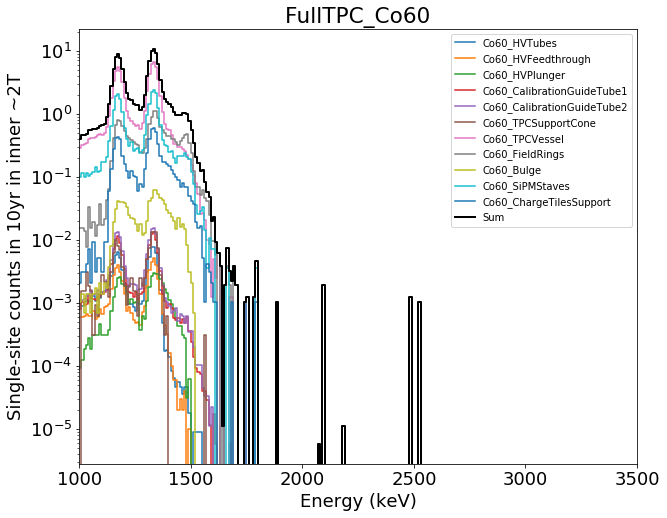

In [16]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)


spectrum_cut_dict_2020 = {'DNN': (0.86,1.),
               'Energy (keV)': (1000.,3500.),
               'Standoff (mm)': (100.,650.)
              }

counter = 0
for group in groups:

    if 'Co60' not in group: continue
    
    
    plt.figure(counter)

    #if group == 'Off': continue
    
    component_list = group_component_dict[group]
    
    # Get first component histogram, so we can get the shape and create an empty sum_hist
    idx = model2020_ind.GetVariableIndexByName(component_list[0])
    test_hist = model2020_ind.GetSlicedDistribution(cut_dict=spectrum_cut_dict_2020,\
                                                    renormalize=False,\
                                                    var_name=component_list[0],\
                                                    verbose=False)
    sum_hist = hl.Hist(bins=test_hist.bins,values=np.zeros(test_hist.values.shape))
    
    print('\n********** {} ***********'.format(group))
    print('{:<33} {:>13} {:>16}'.format('Name','Counts (ROI)','Percent of grp'))
    
    

    for component in component_list:
        this_hist = model2020_ind.GetSlicedDistribution(cut_dict=spectrum_cut_dict_2020,\
                                                renormalize=False,\
                                                var_name=component,\
                                                verbose=False)
        idx = model2020_ind.GetVariableIndexByName(component)
        this_val = model2020_ind.variable_list[idx]['Value']
        hl.plot1d(this_hist.project([1])*this_val,label=component)
        
        sum_hist = sum_hist + this_hist*this_val
        
        this_comp_in_roi = model2020_ind.GetComponentIntegralInBinRange(component,\
                                                    workspace2020_ind.GetROIBinIndices())
        print('{:<33} {:>13.3} {:>16.4}%'.format(component,\
                                            this_comp_in_roi,\
                                            this_comp_in_roi/group_bkg_dict[group]*100.))
        
    # Now look at all "off" components    
    component_list = group_component_dict['Off']
    
    for component in component_list:
        if 'Co60' not in component: continue
        this_hist = model2020_ind.GetSlicedDistribution(cut_dict=spectrum_cut_dict_2020,\
                                                renormalize=False,\
                                                var_name=component,\
                                                verbose=False)
        idx = model2020_ind.GetVariableIndexByName(component)
        this_val = model2020_ind.variable_list[idx]['Value']
        hl.plot1d(this_hist.project([1])*this_val,label=component)
        
        #sum_hist = sum_hist + this_hist*this_val
        
        this_comp_in_roi = model2020_ind.GetComponentIntegralInBinRange(component,\
                                                    workspace2020_ind.GetROIBinIndices())
        print('{:<33} {:>13.3} {:>16.4}%'.format(component,\
                                            this_comp_in_roi,\
                                            this_comp_in_roi/group_bkg_dict[group]*100.))
        
        
    hl.plot1d(sum_hist.project([1]),color='k',linewidth=2,label="Sum")
    plt.yscale('log')
    plt.legend(fontsize=10)
    plt.ylabel('Single-site counts in 10yr in inner ~2T')
    plt.xlabel('Energy (keV)')
    plt.title(group)
    plt.xlim(1000.,3500.)
        
    
    
    counter+=1
    

# Bkg contributions from electroformed copper model (D-024)




In [18]:
optimized_binning_yaml = '../config/Sensitivity2020_Optimized_DNN_Standoff_Binning_version1.yaml'
workspace2020_d024 = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)
workspace2020_d024_ind = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)

optimized_binning_components_table = '/p/vast1/nexo/sensitivity2020/pdfs/component_tables/ComponentsTable_D-024_Optimized_DNN_Standoff_Binning_version1_merged-v10b_AllCo60.h5'
workspace2020_d024.LoadComponentsTableFromFile(optimized_binning_components_table)
workspace2020_d024_ind.LoadComponentsTableFromFile(optimized_binning_components_table)





Loading input data froma previously-generated components table....

Loaded dataframe with 140 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']

Loading input data froma previously-generated components table....

Loaded dataframe with 140 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']


In [19]:
#Give each compoennt its own group

groupdict2020_d024 = {}
for index, row in workspace2020_d024_ind.df_components.iterrows():
    if row['Histogram'] is None:
        continue
    groupdict2020_d024[row['PDFName']] = row['Group']
    workspace2020_d024_ind.df_components.loc[index,'Group'] = row['PDFName']

groups_d024 = set(groupdict2020_d024.values())

group_component_dict_d024 = dict()

for group in groups_d024:
    group_component_dict_d024[group] = \
                [k for k,v in groupdict2020_d024.items() if v == group]
    


In [20]:
#Create the PDFs for the standard model
workspace2020_d024.CreateGroupedPDFs()
model2020_d024 = nEXOFitModel.nEXOFitModel()
model2020_d024.AddPDFsFromDataframe(workspace2020_d024.df_group_pdfs,\
                               workspace2020_d024.histogram_axis_names)
model2020_d024.GenerateModelDistribution()

# Create the PDFs for the individual-component model
workspace2020_d024_ind.CreateGroupedPDFs()
model2020_d024_ind = nEXOFitModel.nEXOFitModel()
model2020_d024_ind.AddPDFsFromDataframe(workspace2020_d024_ind.df_group_pdfs,\
                               workspace2020_d024_ind.histogram_axis_names)
model2020_d024_ind.GenerateModelDistribution()



Creating grouped PDFs....
no sigma for Rn222_HFE (R-053.9.1.1)
no sigma for Rn222_CathodeRadon (R-088.1.1.1)
no sigma for Rn222_ActiveLXe (R-088.2.1.1)
no sigma for Rn222_InactiveLXe (R-088.3.1.1)

ERROR: No histogram available for K40_OuterCryostatWTSupport

ERROR: No histogram available for Co60_OuterCryostatWTSupport
	Group:                              	Expected Counts:
	Far                                 	      5073.3134
	Vessel_U238                         	      1923.6764
	Vessel_Th232                        	       608.1521
	Internals_U238                      	      5187.5593
	Internals_Th232                     	      2746.3601
	FullTPC_K40                         	  40793795.4507
	Rn222                               	     19019.0283
	B8nu                                	        12.9712
	FullLXeBb2n                         	  14756881.4535
	FullLXeBb0n                         	         0.0001
	Xe137                               	        59.6881
	Ar42                       

Hist(14 bins in [0.0,1.0], 250 bins in [1000.0,3500.0], 22 bins in [0.0,650.0], with sum 64426248.810726635, 8309 empty bins, and 0 non-finite values)

## Relative contributions to ROI

In [21]:
roi_cut_dict_2020_d024 = {'DNN': (0.86,1.),
                    'Energy (keV)': (2434., 2480.),
                    'Standoff (mm)': (104.5, 650.)
                    }

workspace2020_d024.DefineROI( roi_cut_dict_2020_d024 )
workspace2020_d024_ind.DefineROI( roi_cut_dict_2020_d024 )


total_in_ROI_d024 = model2020_d024.GetIntegralInBinRange(workspace2020_d024.GetROIBinIndices())
print('\n\n{:4.4} total events in ROI'.format(total_in_ROI_d024))

print('{:<20} {:>13} {:>13}'.format('Name','Counts','Percent'))

group_bkg_dict_d024 = dict()

for row in model2020_d024.variable_list:
    this_group_in_roi = model2020_d024.GetComponentIntegralInBinRange(row['Name'],workspace2020_d024.GetROIBinIndices())
    print('{:<20} {:>13.3} {:>13.3}%'.format(row['Name'],\
                                            this_group_in_roi,\
                                            this_group_in_roi/total_in_ROI_d024*100.))
    group_bkg_dict_d024[row['Name'][4:]] = this_group_in_roi

DNN:
	Input ROI boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input ROI boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input ROI boundaries:     104.5,    650.0
	Actual ROI boundaries:    100.0,    650.0
DNN:
	Input ROI boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input ROI boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input ROI boundaries:     104.5,    650.0
	Actual ROI boundaries:    100.0,    650.0


5.228 total events in ROI
Name                        Counts       Percent
Num_Far                       1.14          21.7%
Num_Vessel_U238              0.355           6.8%
Num_Vessel_Th232            0.0874          1.67%
Num_Internals_U238            0.77          14.7%
Num_Internals_Th232          0.049         0.937%
Num_FullTPC_K40                0.0           0.0%
Num_Rn222                     2.22     

In [22]:
# plt.rcParams.update({'font.size': 18})
# plt.rcParams['figure.figsize'] = (10,8)


# spectrum_cut_dict_2020 = {'DNN': (0.86,1.),
#                'Energy (keV)': (1000.,3500.),
#                'Standoff (mm)': (100.,650.)
#               }

# counter = 0
# for group in groups_d024:
    
#     plt.figure(counter)
    
#     if group == 'Off': continue
    
#     component_list = group_component_dict_d024[group]
    
#     # Get first component histogram, so we can get the shape and create an empty sum_hist
#     idx = model2020_d024_ind.GetVariableIndexByName(component_list[0])
#     test_hist = model2020_d024_ind.GetSlicedDistribution(cut_dict=spectrum_cut_dict_2020,\
#                                                     renormalize=False,\
#                                                     var_name=component_list[0],\
#                                                     verbose=False)
#     sum_hist = hl.Hist(bins=test_hist.bins,values=np.zeros(test_hist.values.shape))
    
#     print('\n********** {} ***********'.format(group))
#     print('{:<33} {:>13} {:>16}'.format('Name','Counts (ROI)','Percent of grp'))
    
    

#     for component in component_list:
#         this_hist = model2020_d024_ind.GetSlicedDistribution(cut_dict=spectrum_cut_dict_2020,\
#                                                 renormalize=False,\
#                                                 var_name=component,\
#                                                 verbose=False)
#         idx = model2020_d024_ind.GetVariableIndexByName(component)
#         this_val = model2020_d024_ind.variable_list[idx]['Value']
#         hl.plot1d(this_hist.project([1])*this_val,label=component)
        
#         sum_hist = sum_hist + this_hist*this_val
        
#         this_comp_in_roi = model2020_d024_ind.GetComponentIntegralInBinRange(component,\
#                                                     workspace2020_d024_ind.GetROIBinIndices())
#         print('{:<33} {:>13.3} {:>16.4}%'.format(component,\
#                                             this_comp_in_roi,\
#                                             this_comp_in_roi/group_bkg_dict_d024[group]*100.))
        
        
#     hl.plot1d(sum_hist.project([1]),color='k',linewidth=2,label="Sum")
#     plt.yscale('log')
#     plt.legend(fontsize=8)
#     plt.ylabel('Single-site counts in 10yr in inner ~2T')
#     plt.xlabel('Energy (keV)')
#     plt.title(group)
#     plt.xlim(1000.,3500.)
        
    
    
#     counter+=1
    

## Background comparison for D-023, D-024

Far                   1.135      1.135
Vessel_U238           2.676     0.3553
Vessel_Th232         0.2254     0.0874
Internals_U238        3.388     0.7705
Internals_Th232     0.09353    0.04899
FullTPC_K40             0.0        0.0
Rn222                  2.22       2.22
B8nu                 0.1169     0.1169
FullLXeBb2n         0.05862    0.05862
FullLXeBb0n       4.014e-05  4.014e-05
Xe137                0.3953     0.3953
Ar42                0.03937    0.03937


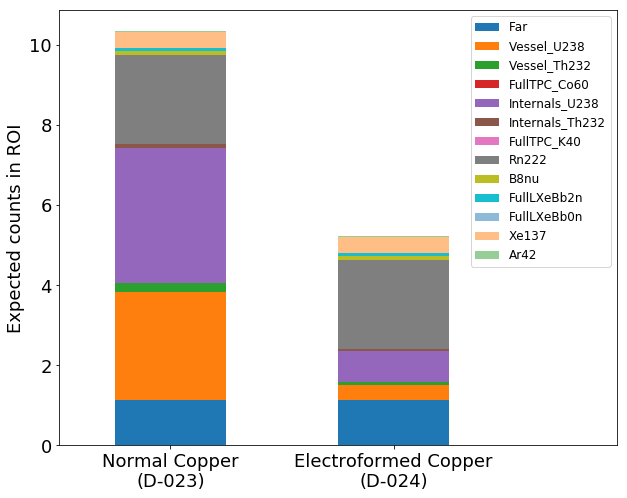

In [27]:
colors=plt.rcParams['axes.prop_cycle'].by_key()['color']



last_group_counts_023 = 0.
last_group_counts_024 = 0.

counter = 0
facealpha = 1.
for name,counts in group_bkg_dict.items():
    
    if name != 'FullTPC_Co60':
        print('{:<16} {:>10.4} {:>10.4}'.format(name,counts,group_bkg_dict_d024[name]))
    
    if counter == len(colors):
        counter = 0
        facealpha*=0.5
    
    plt.bar(1,counts,0.5,bottom=last_group_counts_023,label=name,color=colors[counter],alpha=facealpha)
    last_group_counts_023 += counts
    
    if name == 'FullTPC_Co60':
        plt.bar(2,0.,0.5,bottom=last_group_counts_024,color=colors[counter],alpha=facealpha)
    else:
        plt.bar(2,group_bkg_dict_d024[name],0.5,bottom=last_group_counts_024,color=colors[counter],alpha=facealpha)
        last_group_counts_024 += group_bkg_dict_d024[name]
        
    counter += 1
        
plt.legend(fontsize=12)
plt.xlim(0.5,3.)
plt.ylabel('Expected counts in ROI')
plt.xticks([1.,2.],['Normal Copper\n(D-023)','Electroformed Copper\n(D-024)'])
plt.savefig('plots/roi_background_contributions_by_group_D023_and_D024.png',dpi=200,bbox_inches='tight')


    

# Comparing the Rn222 PDF with the Internals_U238 PDF

In [20]:
int_idx = model2020.GetVariableIndexByName('Internals_U238')
rn222_idx = model2020.GetVariableIndexByName('Rn222')



Text(0, 0.5, 'Standoff (mm)')

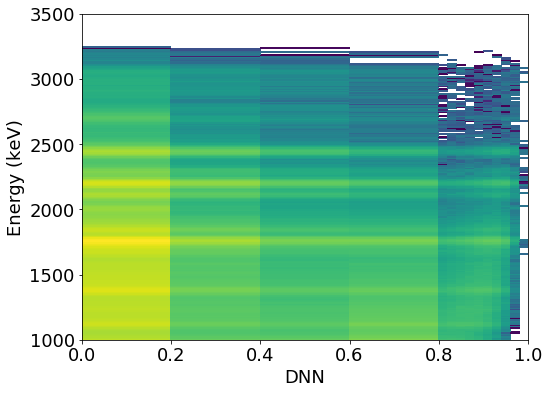

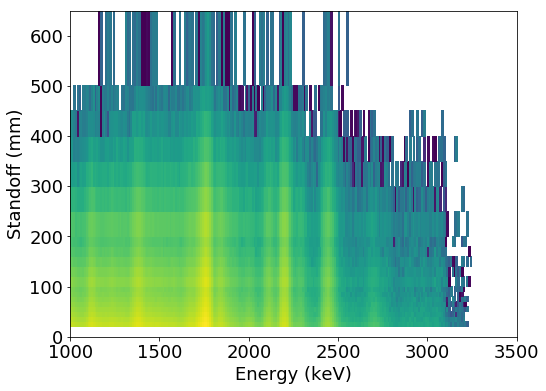

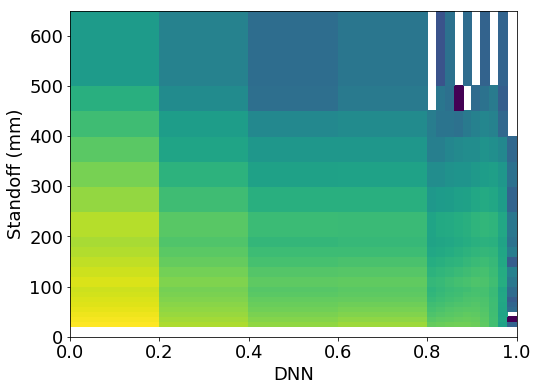

In [23]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (8,6)

histint = model2020.pdfs[int_idx]


hl.plot2d(histint.project([0,1]).log10())
plt.xlabel('DNN')
plt.ylabel('Energy (keV)')


plt.figure(2)
hl.plot2d(histint.project([1,2]).log10())
plt.xlabel('Energy (keV)')
plt.ylabel('Standoff (mm)')

plt.figure(3)
hl.plot2d(histint.project([0,2]).log10())
plt.xlabel('DNN')
plt.ylabel('Standoff (mm)')


Text(0, 0.5, 'Standoff (mm)')

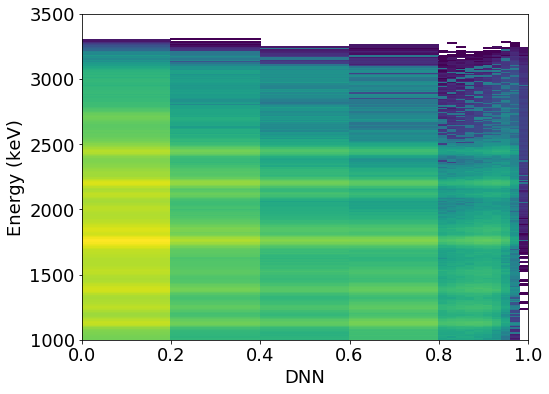

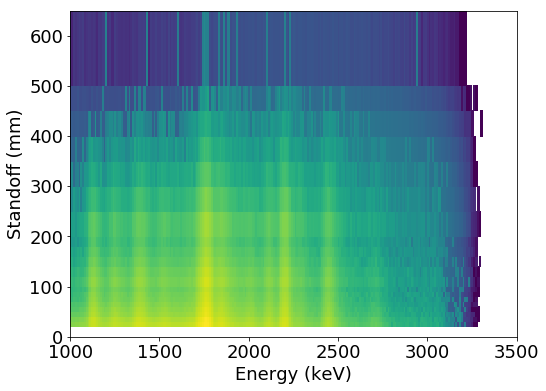

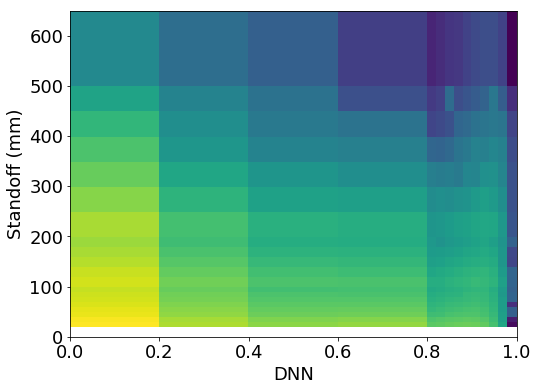

In [24]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (8,6)

histrn222 = model2020.pdfs[rn222_idx]


hl.plot2d(histrn222.project([0,1]).log10())
plt.xlabel('DNN')
plt.ylabel('Energy (keV)')


plt.figure(2)
hl.plot2d(histrn222.project([1,2]).log10())
plt.xlabel('Energy (keV)')
plt.ylabel('Standoff (mm)')

plt.figure(3)
hl.plot2d(histrn222.project([0,2]).log10())
plt.xlabel('DNN')
plt.ylabel('Standoff (mm)')

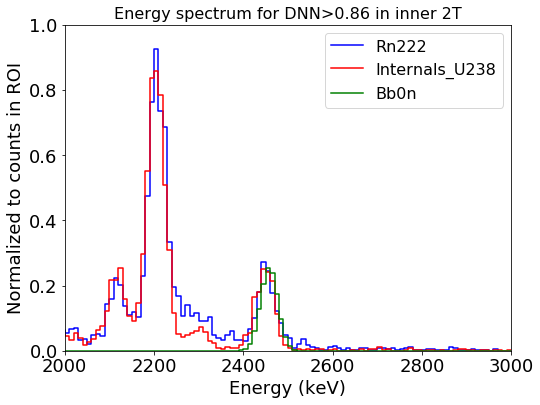

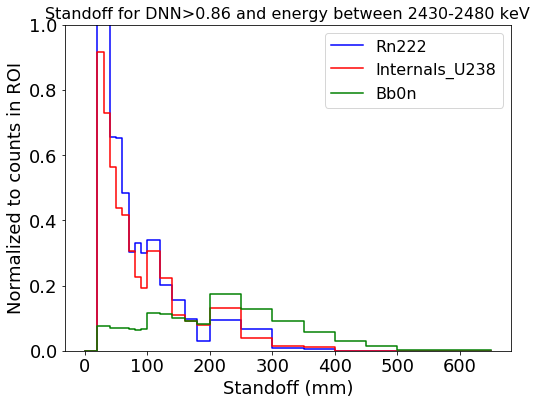

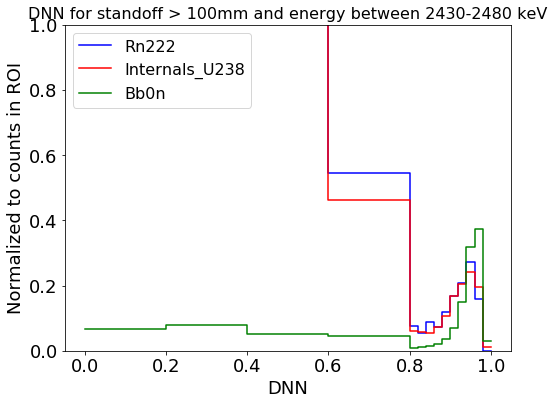

In [46]:
eproj_cut_dict = {'DNN': (0.86,1.),
                    'Energy (keV)': (1000., 3500.),
                    'Standoff (mm)': (104.5, 650.)
                    }
stproj_cut_dict = {'DNN': (0.86,1.),
                    'Energy (keV)': (2434., 2480.),
                    'Standoff (mm)': (0., 650.)
                    }
dnn_cut_dict = {'DNN': (0.,1.),
                    'Energy (keV)': (2434., 2480.),
                    'Standoff (mm)': (104.5, 650.)
                    }

rn222_in_roi = model2020.GetComponentIntegralInBinRange('Rn222',\
                                                        workspace2020.GetROIBinIndices())
rn222_idx = model2020.GetVariableIndexByName('Rn222')
int_in_roi = model2020.GetComponentIntegralInBinRange('Internals_U238',\
                                                        workspace2020.GetROIBinIndices())
int_idx = model2020.GetVariableIndexByName('Internals_U238')
bb0n_in_roi = model2020.GetComponentIntegralInBinRange('Bb0n',\
                                                        workspace2020.GetROIBinIndices())
bb0n_idx = model2020.GetVariableIndexByName('Bb0n')

rn222_scale = model2020.variable_list[rn222_idx]['Value']/rn222_in_roi
int_scale = model2020.variable_list[int_idx]['Value']/int_in_roi
bb0n_scale = model2020.variable_list[bb0n_idx]['Value']/bb0n_in_roi


# Get the energy projections
rn222eproj = model2020.GetSlicedDistribution(cut_dict=eproj_cut_dict,\
                                                renormalize=False,\
                                                var_name='Rn222',\
                                                verbose=False)
inteproj = model2020.GetSlicedDistribution(cut_dict=eproj_cut_dict,\
                                                renormalize=False,\
                                                var_name='Internals_U238',\
                                                verbose=False)
bb0neproj = model2020.GetSlicedDistribution(cut_dict=eproj_cut_dict,\
                                                renormalize=False,\
                                                var_name='Bb0n',\
                                                verbose=False)
#model2020.GetComponentIntegralInBinRange()
hl.plot1d( rn222eproj.project([1])*rn222_scale, color='b', label='Rn222')
hl.plot1d( inteproj.project([1])*int_scale, color='r', label='Internals_U238')
hl.plot1d( bb0neproj.project([1])*bb0n_scale,color='g', label='Bb0n')

plt.xlabel('Energy (keV)')
plt.ylabel('Normalized to counts in ROI')
plt.title('Energy spectrum for DNN>0.86 in inner 2T',fontsize=16)
plt.legend(fontsize=16)
plt.xlim(2000.,3000.)
#plt.yscale('log')
plt.ylim(0.,1.)

plt.savefig('plots/rn222_internalsU238_energy_spectrum_comparison.png',\
            dpi=200,bbox_inches='tight')

plt.figure(2)

rn222stproj = model2020.GetSlicedDistribution(cut_dict=stproj_cut_dict,\
                                                renormalize=False,\
                                                var_name='Rn222',\
                                                verbose=False)
intstproj = model2020.GetSlicedDistribution(cut_dict=stproj_cut_dict,\
                                                renormalize=False,\
                                                var_name='Internals_U238',\
                                                verbose=False)
bb0nstproj = model2020.GetSlicedDistribution(cut_dict=stproj_cut_dict,\
                                                renormalize=False,\
                                                var_name='Bb0n',\
                                                verbose=False)
hl.plot1d( rn222stproj.project([2])*rn222_scale, color='b', label='Rn222')
hl.plot1d( intstproj.project([2])*int_scale, color='r', label='Internals_U238')
hl.plot1d( bb0nstproj.project([2])*bb0n_scale,color='g', label='Bb0n')

plt.xlabel('Standoff (mm)')
plt.ylabel('Normalized to counts in ROI')
plt.title('Standoff for DNN>0.86 and energy between 2430-2480 keV',fontsize=16)
plt.legend(fontsize=16)
#plt.yscale('log')
plt.ylim(0.,1.)
plt.savefig('plots/rn222_internalsU238_standoff_comparison.png',\
            dpi=200,bbox_inches='tight')


plt.figure(3)

rn222dnnproj = model2020.GetSlicedDistribution(cut_dict=dnn_cut_dict,\
                                                renormalize=False,\
                                                var_name='Rn222',\
                                                verbose=False)
intdnnproj = model2020.GetSlicedDistribution(cut_dict=dnn_cut_dict,\
                                                renormalize=False,\
                                                var_name='Internals_U238',\
                                                verbose=False)
bb0ndnnproj = model2020.GetSlicedDistribution(cut_dict=dnn_cut_dict,\
                                                renormalize=False,\
                                                var_name='Bb0n',\
                                                verbose=False)
hl.plot1d( rn222dnnproj.project([0])*rn222_scale, color='b', label='Rn222')
hl.plot1d( intdnnproj.project([0])*int_scale, color='r', label='Internals_U238')
hl.plot1d( bb0ndnnproj.project([0])*bb0n_scale,color='g', label='Bb0n')

plt.xlabel('DNN')
plt.ylabel('Normalized to counts in ROI')
plt.title('DNN for standoff > 100mm and energy between 2430-2480 keV',fontsize=16)
plt.legend(fontsize=16)
#plt.yscale('log')
plt.ylim(0.,1.)
plt.savefig('plots/rn222_internalsU238_DNN_comparison.png',\
            dpi=200,bbox_inches='tight')




